#  Libraries



In [32]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
# load dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
#print the first five rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# get  some information about the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#check for missing value
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Data Analysis

In [5]:
# get statistical description of the dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

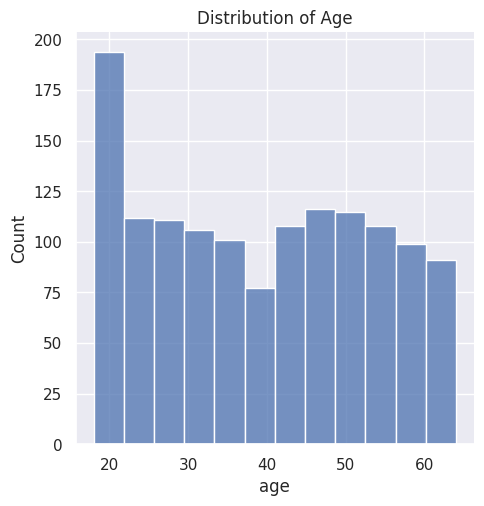

In [6]:
# plot the distribution of the age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['age'])
plt.title('Distribution of Age')
plt.show()

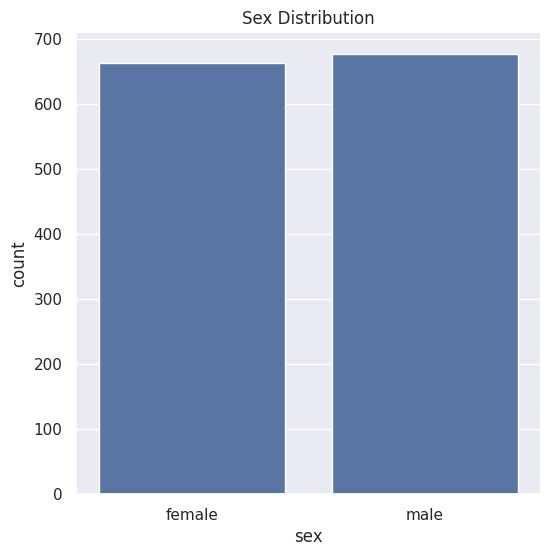

In [7]:
# plot the gender using countplot
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance)
plt.title('Sex Distribution')
plt.show()

In [8]:
insurance['sex'].value_counts()

,count
sex,
male,676
female,662


<Figure size 600x600 with 0 Axes>

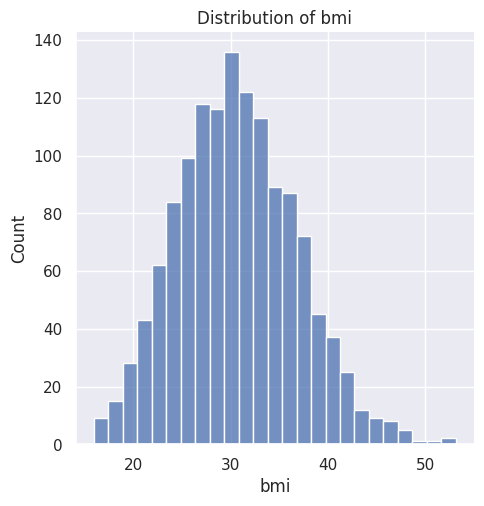

In [9]:
# plot the distribution of the bmi
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['bmi'])
plt.title('Distribution of bmi')
plt.show()

Normal BMI Range is 18.5 t0 24.9

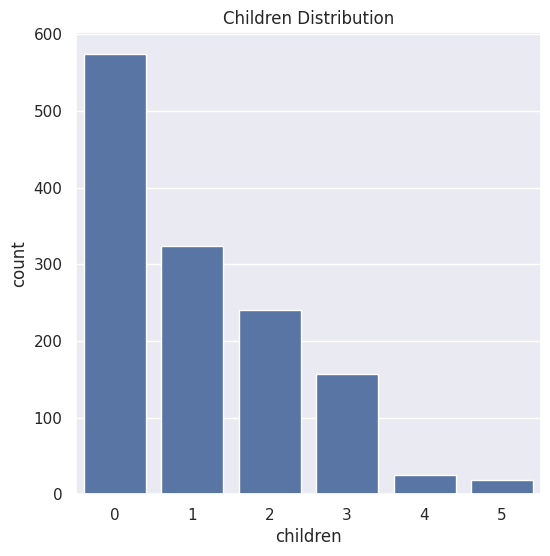

In [10]:
# plot the children using countplot
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance)
plt.title('Children Distribution')
plt.show()

In [11]:
insurance['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


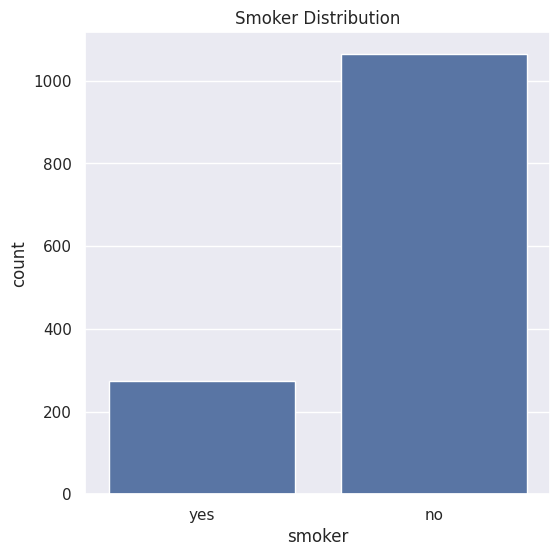

In [12]:
# plot the smoker using countplot
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance)
plt.title('Smoker Distribution')
plt.show()

In [13]:
insurance['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


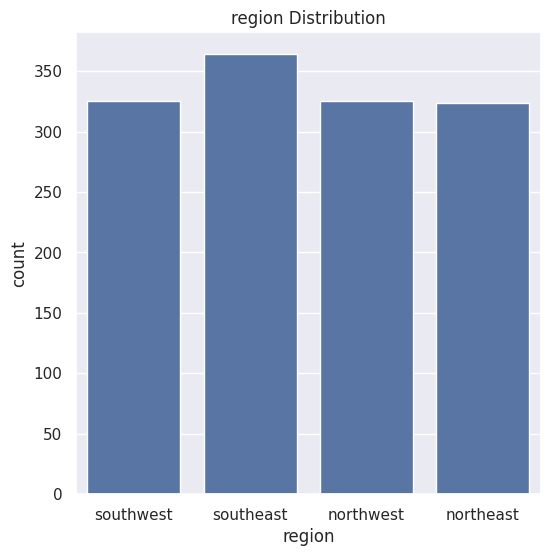

In [14]:
# plot the region using countplot
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance)
plt.title('region Distribution')
plt.show()

In [15]:
insurance['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 600x600 with 0 Axes>

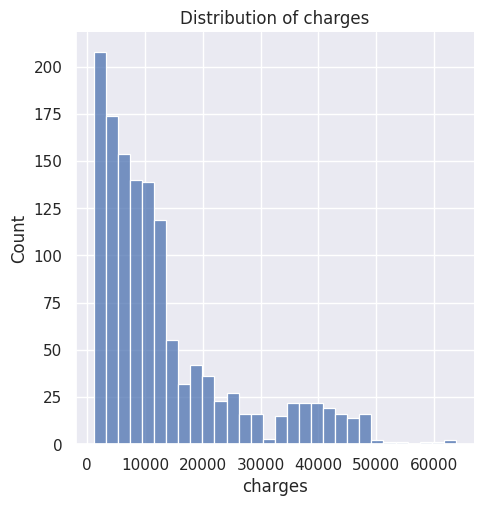

In [16]:
# plot the distribution of the charges
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['charges'])
plt.title('Distribution of charges')
plt.show()

# Data Preprocessing

## Encoding the categorical features

In [33]:
# encoding sex column
insurance.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding smoker column
insurance.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding region column
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

print(insurance.head())


   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520


# Data Seperation

In [18]:
# split the X and y
X = insurance.drop(columns='charges', axis=1)
y = insurance['charges']

In [19]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [20]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [21]:
#split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

In [23]:

model = LinearRegression()
# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

# Make prediction with the model

In [25]:
#predict
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)


# Model Performance Evaluation

In [26]:
#evaluate the model
train_r2 = r2_score(y_train, train_pred)
print('R2 score for training data: ', train_r2)

#test set
test_r2 = r2_score(y_test, test_pred)
print('R2 score for test data: ', test_r2)

R2 score for training data:  0.7373792687340877
R2 score for test data:  0.79523525268784


# Build a Predicting System

In [34]:
input_data = (27,0,42.13,0,0,0)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is ', prediction[0])

[31426.85927537]
The insurance cost is  31426.859275369356
